<a href="https://colab.research.google.com/github/ashrafabuareesh/Prediction-_of-Product-Sales/blob/main/importances_and_coefficients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder ,OrdinalEncoder
from sklearn.preprocessing  import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import missingno
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
fpath="/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv"
df=pd.read_csv(fpath)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Prepare Dataset for Modeling

In [36]:
df.drop(columns="Item_Identifier",inplace=True)
df
#Column for duplicate
df.duplicated().sum()

0

In [37]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [39]:
col_num = df.select_dtypes("number").columns
col_num
for col in col_num:
  print(f"name {col}")
  print(f"value counts {df[col].describe()}\t")
  print("\n")

name Item_Weight
value counts count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64	


name Item_Visibility
value counts count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64	


name Item_MRP
value counts count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64	


name Outlet_Establishment_Year
value counts count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64	


name Item_Outlet_Sales
value c

# Create a ColumnTransformer to preprocess the data

In [40]:
## Train test split
y=df['Item_Outlet_Sales']
X=df.drop(columns=['Item_Outlet_Sales','Outlet_Identifier'])
X_train ,X_test , y_train,y_test= train_test_split(X,y,random_state=42)
len(X_train)/ len(df)

0.7499706676053033

## pipelines

###  Numericl

In [41]:
num_cols=X_train.select_dtypes("number").columns
imputer_median =SimpleImputer(strategy="median")
scaler= StandardScaler()
num_pipe= make_pipeline(imputer_median,scaler )
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

### Ordinal

In [42]:
ord_cols=['Outlet_Size']
impute_ord = SimpleImputer(strategy='most_frequent')
qual_cond_order=['Small','Medium' ,'High']
ordinal_category_orders = [qual_cond_order]
ord_Encoder=OrdinalEncoder(categories=ordinal_category_orders)

scaler=StandardScaler()
ord_pipe=make_pipeline(impute_ord,ord_Encoder,scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [43]:
ord_cols=['Outlet_Size']
X_train['Outlet_Size'].value_counts(dropna=False)

Outlet_Size
Medium    2103
NaN       1812
Small     1788
High       689
Name: count, dtype: int64

In [44]:
X_train.isna().sum()

Item_Weight                  1107
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1812
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### categorical

In [45]:
cat_cols=X_train.select_dtypes("object").drop(columns=ord_cols).columns
imuter_na=SimpleImputer(strategy="constant",fill_value="Na")
cat_ohe=OneHotEncoder(sparse=False,drop='first')
cat_pipe=make_pipeline(imuter_na,cat_ohe)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Na', strategy='constant')),
                ('onehotencoder', OneHotEncoder(drop='first', sparse=False))])

In [46]:
#ColumnTransformer
cat_tuples= ("categorical",cat_pipe,cat_cols)
num_tuples=("numeric",num_pipe,num_cols )
ord_tuples=("Ordinal", ord_pipe,ord_cols)
print(cat_tuples)
print(num_tuples)
print(ord_tuples)

('categorical', Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Na', strategy='constant')),
                ('onehotencoder', OneHotEncoder(drop='first', sparse=False))]), Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))
('numeric', Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())]), Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))
('Ordinal', Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())]), ['Outlet_Size'])


In [47]:
#ColumnTransformer
col_transformer=col_transformer= ColumnTransformer([num_tuples,cat_tuples,ord_tuples ], verbose_feature_names_out=False, remainder="drop")
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Na',
                                                                strategy='constant')),
                                                 ('oneh...
                                                                sparse=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object')),
                                ('Ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])],
                  verbose_feature_names_out=False)

In [48]:
#col_transformer.fit(X_train)

In [ ]:
# Transform the training data
  #X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
#X_test_processed = col_transformer.transform(X_test)
# View the processed training data
#X_train_processed.head()

# Modeling

In [49]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)


## Regression Model

In [50]:
lin_reg =LinearRegression()
lin_pipe = make_pipeline(col_transformer ,lin_reg)
lin_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_va...
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object')),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [51]:
lin_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_va...
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object')),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [52]:
evaluate_regression(lin_pipe , X_train , y_train , X_test ,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.442
- MSE = 1,300,116.941
- RMSE = 1,140.227
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 805.246
- MSE = 1,197,907.337
- RMSE = 1,094.490
- R^2 = 0.566


### LinearRegression  coefficients

In [53]:
col_transformer.fit(X_train)
feature_names=col_transformer.get_feature_names_out()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [54]:
X_train_transformer= pd.DataFrame(col_transformer.transform(X_train),columns=feature_names,index=X_train.index)
X_test_transformer= pd.DataFrame(col_transformer.transform(X_test),columns=feature_names,index=X_test.index)

In [55]:
reg=LinearRegression()
reg.fit(X_train_transformer, y_train)

LinearRegression()

In [56]:
evaluate_regression(reg,X_train_transformer,y_train,X_test_transformer,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.442
- MSE = 1,300,116.941
- RMSE = 1,140.227
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 805.246
- MSE = 1,197,907.337
- RMSE = 1,094.490
- R^2 = 0.566


In [69]:
reg_coef=pd.Series(reg.coef_, name="coefficients" ,index=feature_names)
reg_coef.loc['intercept'] = lin_reg.intercept_
reg_coef.head()

Item_Weight                   -7.811335
Item_Visibility              -21.534415
Item_MRP                     983.912563
Outlet_Establishment_Year      6.967292
Item_Fat_Content_Low Fat      57.623591
Name: coefficients, dtype: float64

In [70]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False,
                annotate=False, ha='left',va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    """Plots the top_n coefficients from a Series, with optional annotations."""
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
           ylabel='Feature Names',
           title=title)
    ax.axvline(0, color='k')

    if annotate==True:
        annotate_hbars(ax, ha=ha,va=va,size=size,xytext=xytext,
                       textcoords=textcoords)
    ## return ax in case want to continue to update/modify figure
    return ax

def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

<Axes: title={'center': 'Top 10 Largest Coefficients'}, xlabel='Coefficient', ylabel='Feature Names'>

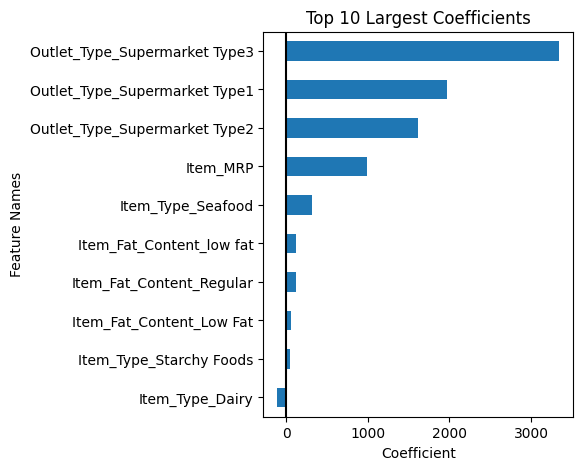

In [74]:
plot_coeffs(reg_coef,top_n=10,)

the top 3 most impactful features :  
 - outlet type :  The type of store (outlet type) can be a factor that greatly influences sales and business performance for the reasons:
Shopping Experience: All kinds of products we offer for a different shopping experience.
 - item_MRP : The maximum selling price of the item also seems to be important, as this factor usually reflects the value of the product and its demand by customers.
 - item_type_seafood  :   The presence of seafood in a store can have a significant impact on store performance




## Random Forest model

In [75]:
# Instantiate default random forest model
rf  = RandomForestRegressor(random_state=42)
# Model Pipeline
rf_pipe = make_pipeline(col_transformer, rf)
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_va...
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object')),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [76]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 299.984
- MSE = 187,184.807
- RMSE = 432.649
- R^2 = 0.937

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 780.133
- MSE = 1,258,118.916
- RMSE = 1,121.659
- R^2 = 0.544


-  R^2 (train data ) > R^2 (test data )  >> overfit

-  which model has the best test scores?
    - Random Forest model


In [77]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Na',
                                                                   strategy='constant')),
                                                    ('oneh...
                                                                   sparse=False))]),
  

In [78]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[100,150,200],
          'randomforestregressor__min_samples_leaf':[1,2,3,4] ,
          'randomforestregressor__oob_score': [False , True]

          }

grid_cv = GridSearchCV(rf_pipe , params ,n_jobs=-1 , verbose=1, )


In [79]:
grid_cv.fit(X_train , y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer...
                                                                         ['Outlet_Size'])],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__min_samples_leaf': [1, 2, 3,
                                                                     4],
                         'randomforestregressor__n_estimators': [100, 150, 200],
                         'randomforestregressor__oob_score': [False, True]},
             verbose=1)

In [80]:
grid_cv.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__n_estimators': 150,
 'randomforestregressor__oob_score': False}

In [81]:
best_model_rf= grid_cv.best_estimator_

In [82]:
evaluate_regression(best_model_rf, X_train , y_train, X_test , y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 620.253
- MSE = 760,600.636
- RMSE = 872.124
- R^2 = 0.743

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 744.445
- MSE = 1,143,455.032
- RMSE = 1,069.325
- R^2 = 0.586


### the feature importances

In [85]:
rf_b  = RandomForestRegressor(random_state=42)
rf_b.fit(X_train_transformer , y_train)

RandomForestRegressor(random_state=42)

In [86]:
evaluate_regression(rf_b,X_train_transformer, y_train, X_test_transformer,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 299.984
- MSE = 187,184.807
- RMSE = 432.649
- R^2 = 0.937

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 780.133
- MSE = 1,258,118.916
- RMSE = 1,121.659
- R^2 = 0.544


In [89]:
from sklearn.inspection import permutation_importance
r= permutation_importance(rf_b, X_train_transformer, y_train)

In [91]:
## can make the mean importances into a series
perm_importances = pd.Series(r['importances_mean'],index=X_train_transformer.columns,
                           name = 'permutation importance')
perm_importances.head()

Item_Weight                  0.107447
Item_Visibility              0.190017
Item_MRP                     1.082242
Outlet_Establishment_Year    0.089753
Item_Fat_Content_Low Fat     0.012737
Name: permutation importance, dtype: float64

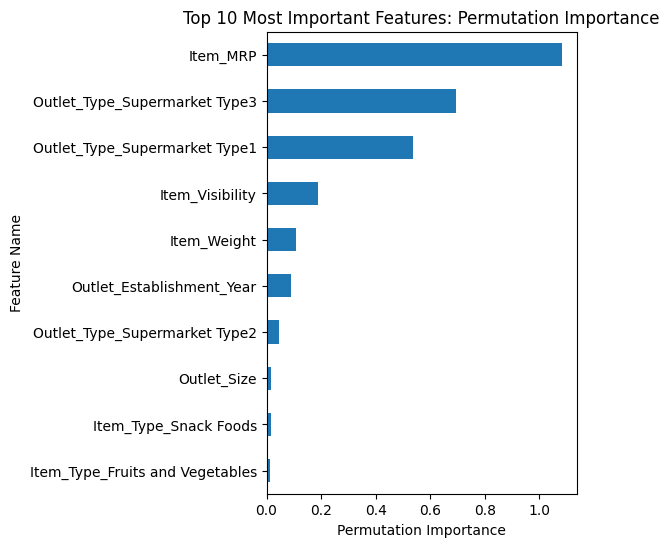

In [92]:
ax = perm_importances.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Permutation Importance',
       title='Top 10 Most Important Features: Permutation Importance');


 Identify the top 5 most important features.

 * item_MRP
 * outlet type
 * item visibility
 * item_weigt
 * outlet_Establishment _year


# Models Evaluated & Results

- Linear Regression Model (Testing Set):

    - R^2: 0.567
    - MAE: 804.194
    - MSE: 1194694.512
    - RMSE: 1093.021

- Random Forest Regressor Model (Testing Set):

  - R^2: 0.562
  - MAE: 763.239
  - MSE: 1209292.343
  -  RMSE: 1099.678
-  Tuned Random Forest Regressor Model (Testing Set):

 - R^2: 0.592

 - MAE: 738.078
 - MSE: 1,126,298.846
 - RMSE: 1,061.272

The Final Model Chosen was a Random Forest Regressor Model with the n_estimators tuned to 150.
 - The Mean Absolute Error was off by about $738.078.

 - The Root Mean Squared Error had a calculation of $1,061.272.


### Compare the training vs. test scores





- Tuned Random Forest Regressor Model (Testing Set):

   - R^2: 0.592

   - MAE: 738.078

   - MSE: 1,126,298.846

   - RMSE: 1,061.272
- Tuned Random Forest Regressor Model (training Set):

   - R^2: 0.721

   - MAE: 644.233

   - MSE: 1,126,298.846

   - RMSE: 909.032

- underfit
